In [6]:
from utils import china_pm_data

In [14]:
df = china_pm_data()
df

,TM,PM10_yanan,PM10_qingdao,PM10_chifeng,PM10_dalian
0,201801010000,195.0,54.0,14.0,49.0
1,201801010300,131.0,73.0,7.0,94.0
2,201801010600,0.0,93.0,11.0,71.0
3,201801010900,171.0,104.0,73.0,120.0
4,201801011200,0.0,118.0,11.0,30.0
...,...,...,...,...,...
11753,202212201200,NaN,NaN,NaN,46.0
11754,202212201500,NaN,NaN,NaN,33.0
11755,202212201800,NaN,NaN,NaN,50.0
11756,202212202100,NaN,NaN,NaN,95.0


In [15]:
import numpy as np

# Remove the null rows
df = df.loc[:10306]
time_column = df["TM"]

pm_columns = df.columns[1:]
df[pm_columns] = df[pm_columns].applymap(lambda x: np.nan if x <= 0 else x)
df

/tmp/ipykernel_4066586/2440706256.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[pm_columns] = df[pm_columns].applymap(lambda x: np.nan if x <= 0 else x)
/tmp/ipykernel_4066586/2440706256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[pm_columns] = df[pm_columns].applymap(lambda x: np.nan if x <= 0 else x)


,TM,PM10_yanan,PM10_qingdao,PM10_chifeng,PM10_dalian
0,201801010000,195.0,54.0,14.0,49.0
1,201801010300,131.0,73.0,7.0,94.0
2,201801010600,NaN,93.0,11.0,71.0
3,201801010900,171.0,104.0,73.0,120.0
4,201801011200,NaN,118.0,11.0,30.0
...,...,...,...,...,...
10302,202206160600,81.0,19.0,45.0,10.0
10303,202206160900,107.0,30.0,47.0,16.0
10304,202206161200,125.0,30.0,56.0,2.0
10305,202206161500,142.0,44.0,57.0,22.0


In [16]:
import pandas as pd

df['TM'] = pd.to_datetime(df['TM'], format='%Y%m%d%H%M')
df.set_index('TM', inplace=True)

# 시간 기반 선형 보간법 적용
df.interpolate(method='time', inplace=True)
df

/tmp/ipykernel_4066586/1948461479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TM'] = pd.to_datetime(df['TM'], format='%Y%m%d%H%M')
/tmp/ipykernel_4066586/1948461479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='time', inplace=True)


,PM10_yanan,PM10_qingdao,PM10_chifeng,PM10_dalian
TM,,,,
2018-01-01 00:00:00,195.0,54.0,14.0,49.0
2018-01-01 03:00:00,131.0,73.0,7.0,94.0
2018-01-01 06:00:00,151.0,93.0,11.0,71.0
2018-01-01 09:00:00,171.0,104.0,73.0,120.0
2018-01-01 12:00:00,129.5,118.0,11.0,30.0
...,...,...,...,...
2022-06-16 06:00:00,81.0,19.0,45.0,10.0
2022-06-16 09:00:00,107.0,30.0,47.0,16.0
2022-06-16 12:00:00,125.0,30.0,56.0,2.0


In [17]:
df.reset_index(inplace=True)
df["TM"] = time_column
df

/tmp/ipykernel_4066586/3681843842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TM"] = time_column


,TM,PM10_yanan,PM10_qingdao,PM10_chifeng,PM10_dalian
0,201801010000,195.0,54.0,14.0,49.0
1,201801010300,131.0,73.0,7.0,94.0
2,201801010600,151.0,93.0,11.0,71.0
3,201801010900,171.0,104.0,73.0,120.0
4,201801011200,129.5,118.0,11.0,30.0
...,...,...,...,...,...
10302,202206160600,81.0,19.0,45.0,10.0
10303,202206160900,107.0,30.0,47.0,16.0
10304,202206161200,125.0,30.0,56.0,2.0
10305,202206161500,142.0,44.0,57.0,22.0


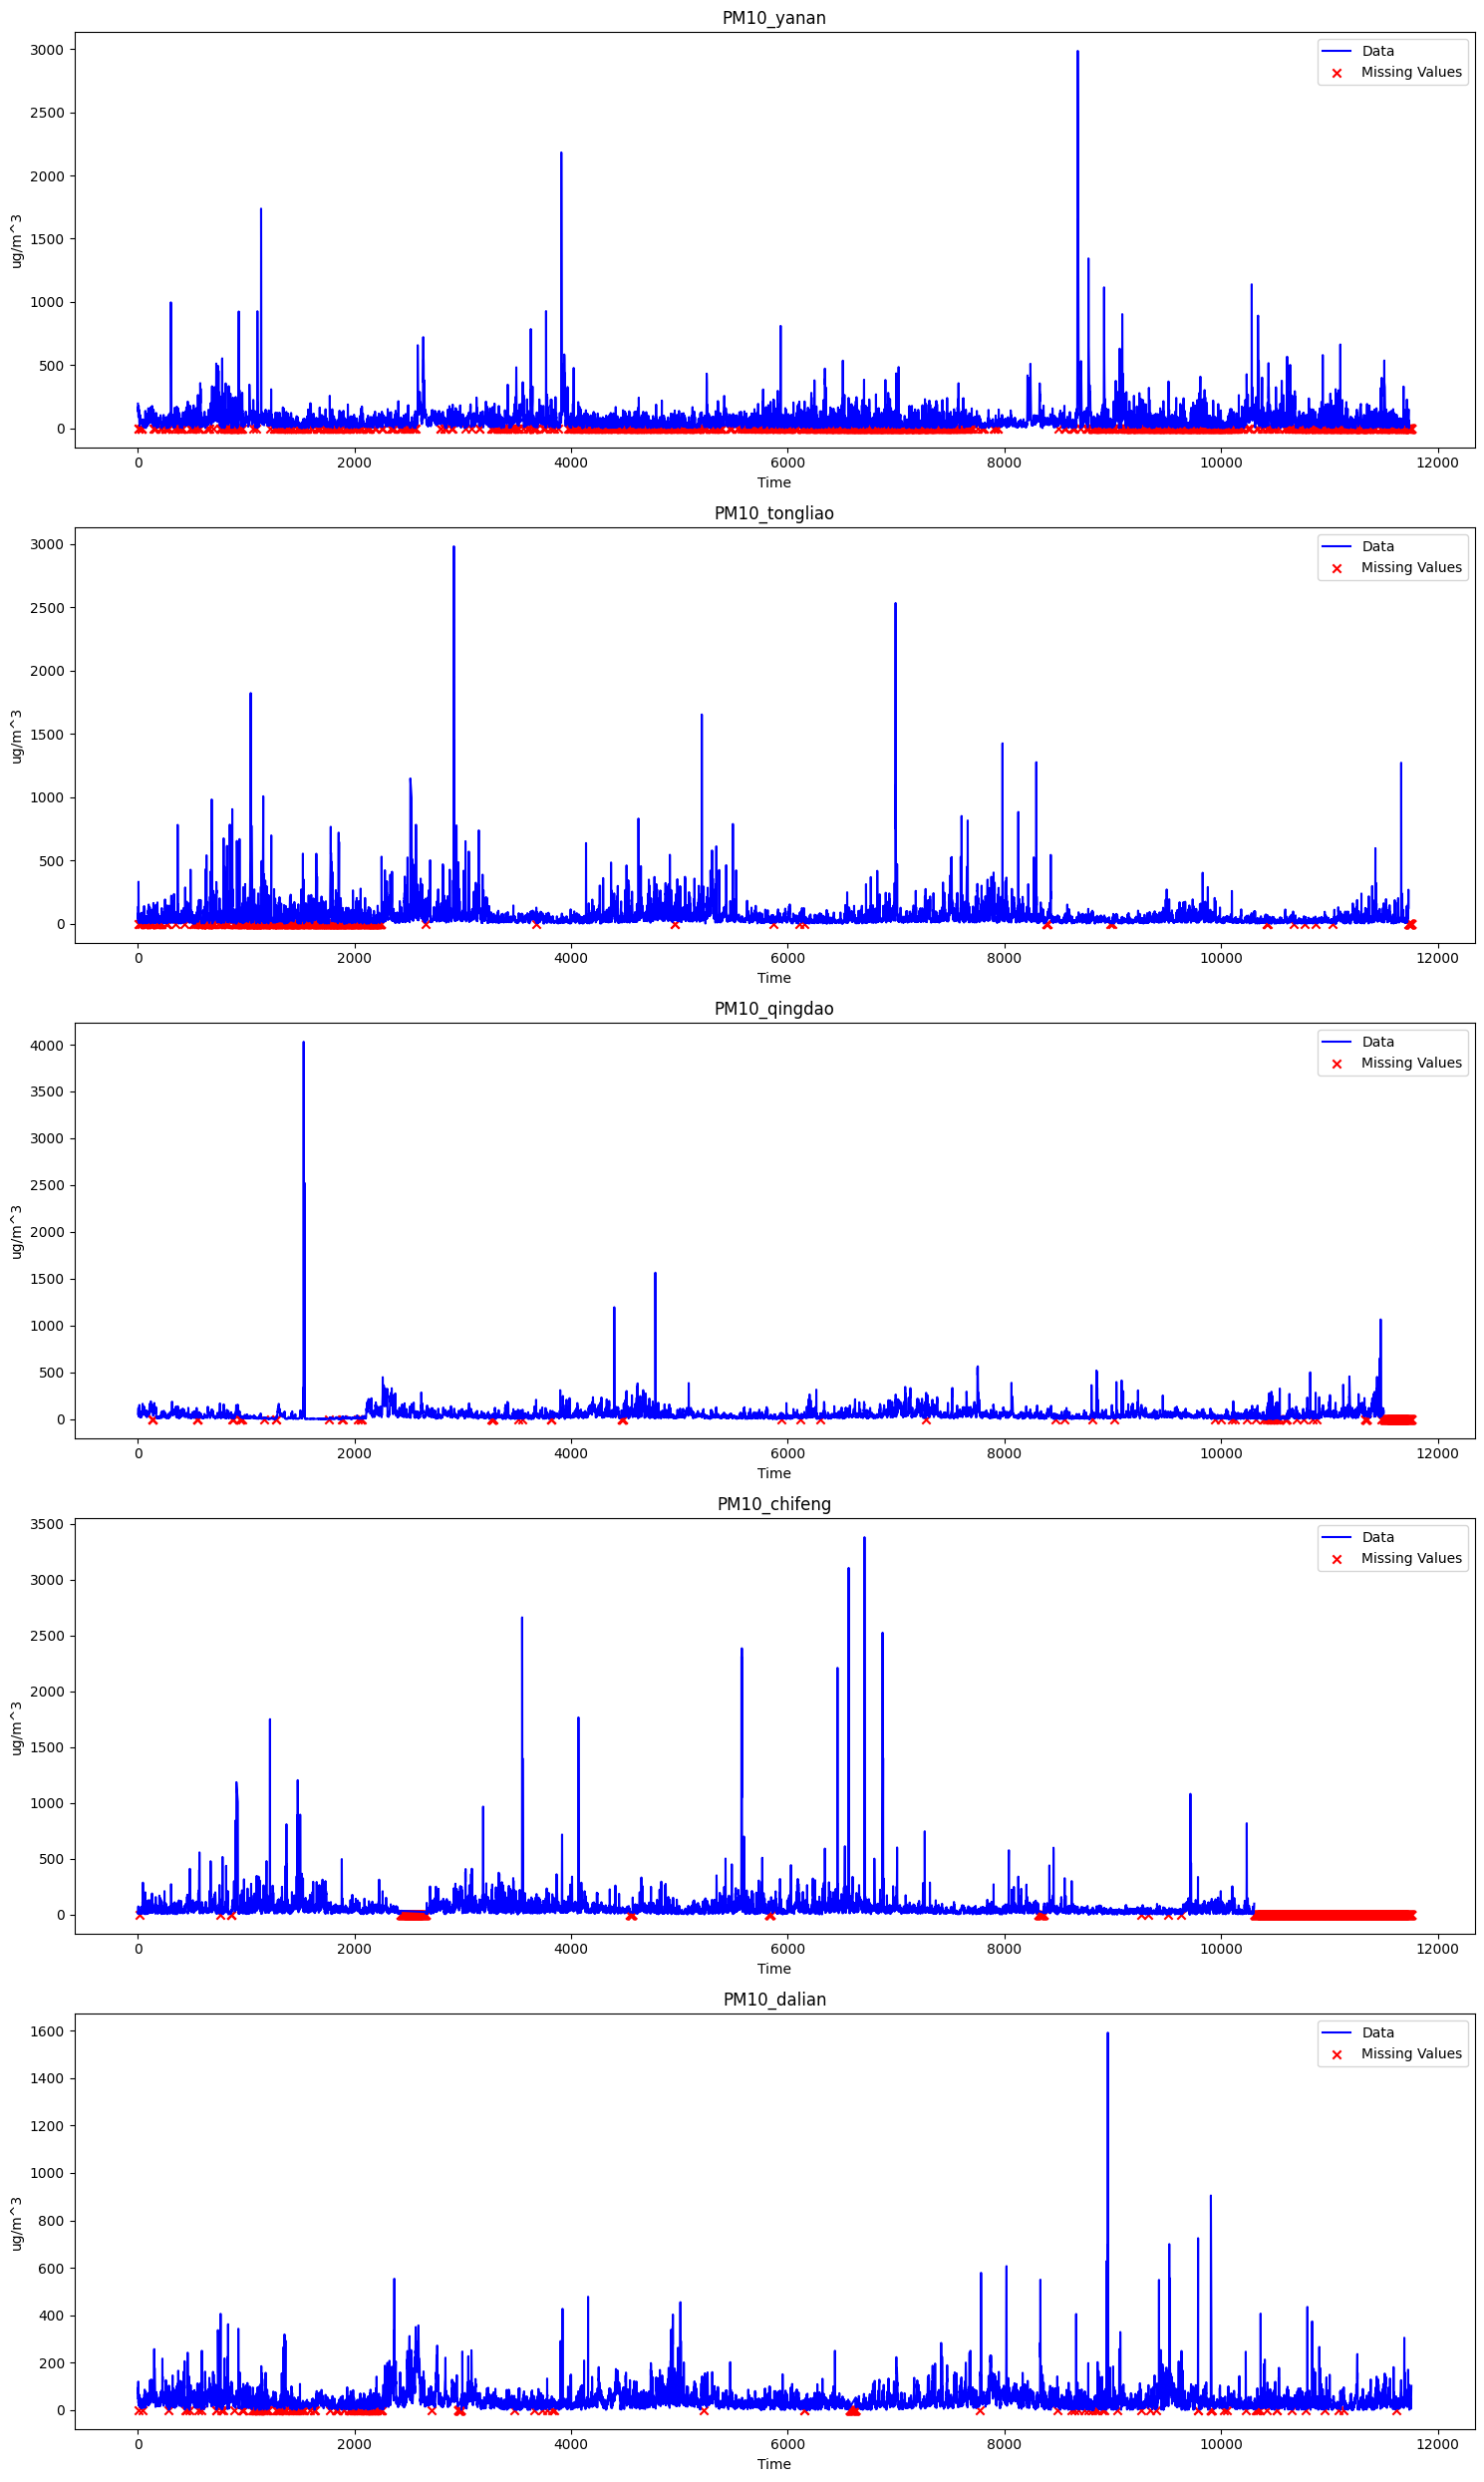

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(len(pm_columns), 1, figsize=(15, 25))
axes = axes.flatten()

for i, column in enumerate(pm_columns):
    # 결측치 제외한 데이터
    valid_data = df[column].dropna()
    
    # 원본 데이터에서 결측치 위치
    missing_mask = df[column].isnull()
    
    # 그래프 그리기
    axes[i].plot(valid_data.index, valid_data.values, label='Data', color='blue')
    axes[i].scatter(
        df[missing_mask].index,  # 결측치의 x 위치
        [0] * missing_mask.sum(),  # 결측치 y 값 (임의로 0으로 표시)
        color='red', marker='x', label='Missing Values'
    )
    
    # 레이블과 제목 설정
    axes[i].set_title(column)
    axes[i].set_ylabel('ug/m^3')
    axes[i].set_xlabel('Time')
    axes[i].legend(loc='upper right')

plt.tight_layout()
plt.show()
